In [28]:
import tensorflow as tf

In [29]:
print(tf.__version__)

2.18.0


In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob

#PARA REDIMENCIONAR
import sklearn
import skimage
from skimage.transform import resize
import random

#Usaremos datetime para nombrar archivos
import datetime
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob

#para redimencionar
import sklearn
import skimage
from skimage.transform import resize

import random
#Usaremos datetime para nombrar archivos
import datetime

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

print(tf.__version__)

2.18.0


In [32]:
#La carpeta de set de entrenamiento train con que se entrena el modelo
#Normal 1352
#Neumonia 1352
#Crear un algoritmo que sea capaz de recolectar las imagenes de las carpetas
#dependiendo si esta en normal y neumonia generar una "y" variable tarjet u
#y al mismo tiempo creando las etiquetas

In [33]:
from pickle import FALSE
train_dir="C:/Users/Atzin Maxela/Desktop/ESCOM/ESCOM/Semestre 6/computo paralelo/clasificacion/chest_xray/chest_xray/train/" #Ruta de variables a los directorios
test_dir="C:/Users/Atzin Maxela/Desktop/ESCOM/ESCOM/Semestre 6/computo paralelo/clasificacion/chest_xray/chest_xray/test/"
LOAD_FROM_IMAGES=False #cONSTANTE CONFIGURADA PARA NO CARGAR LAS IMAGENES
                        #SE CAMBIA A TRUE PARA CORRER EL ALGORITMI DE ABAJO
def get_data(folder):   #funcion que le pasamos una carpeta y su tarea es recorrer los directorios
  x=[]                  #dependiendo en que directorio se encuentra, se procesa la imagen
  y=[]                  #Generamos un array con las "y"
  for folderName in os.listdir(folder):  #Recorrer el listado de directorios
    if not folderName.startswith('.'):  #Que tenemos en folder
      if folderName in ['NORMAL']:
        label=0
      elif folderName in ['PNEUMONIA']:
        label=1
      else:
        label=2
      for image_filename in tqdm(os.listdir(folder+folderName)): #Recorro imagen por imagen dentro del directorio

        img_file=cv2.imread(folder+folderName+'/'+image_filename)
        if img_file is not None:
          img_file=skimage.transform.resize(img_file,(150,150,3),mode='constant',anti_aliasing=True)
          img_file=rgb2gray(img_file)
          img_arr=np.asarray(img_file)
          x.append(img_arr)
          y.append(label)
  x=np.array(x)
  y=np.array(y)
  return x,y


if LOAD_FROM_IMAGES:
  #cARGAMOS LAS IMAGENES A LOS ARRAYS
    x_train,y_train=get_data(train_dir)
    x_test,y_test=get_data(test_dir)

    #GRABAMOS LOS ARRAYS EN ARCHIVOS
    np.save('x_train.npy',x_train)
    np.save('y_train.npy',y_train)
    np.save('x_test.npy',x_test)
    np.save('y_test.npy',y_test)
else:
  x_train=np.load('x_train.npy')
  y_train=np.load('y_train.npy')
  x_test=np.load('x_test.npy')
  y_test=np.load('y_test.npy')





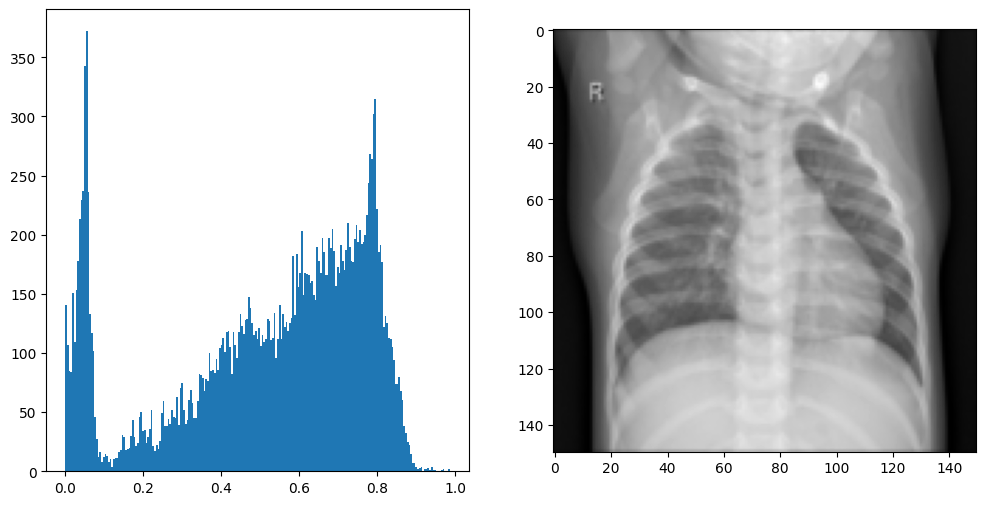

In [34]:
def plotHistograma(a):
  plt.figure(figsize=( 12,6))
  plt.subplot(1,2,1)
  plt.hist(a.ravel(),bins=225)
  plt.subplot(1,2,2)
  plt.imshow(a,cmap='gray',vmin=0,vmax=1)
  plt.show()

plotHistograma(x_train[3])

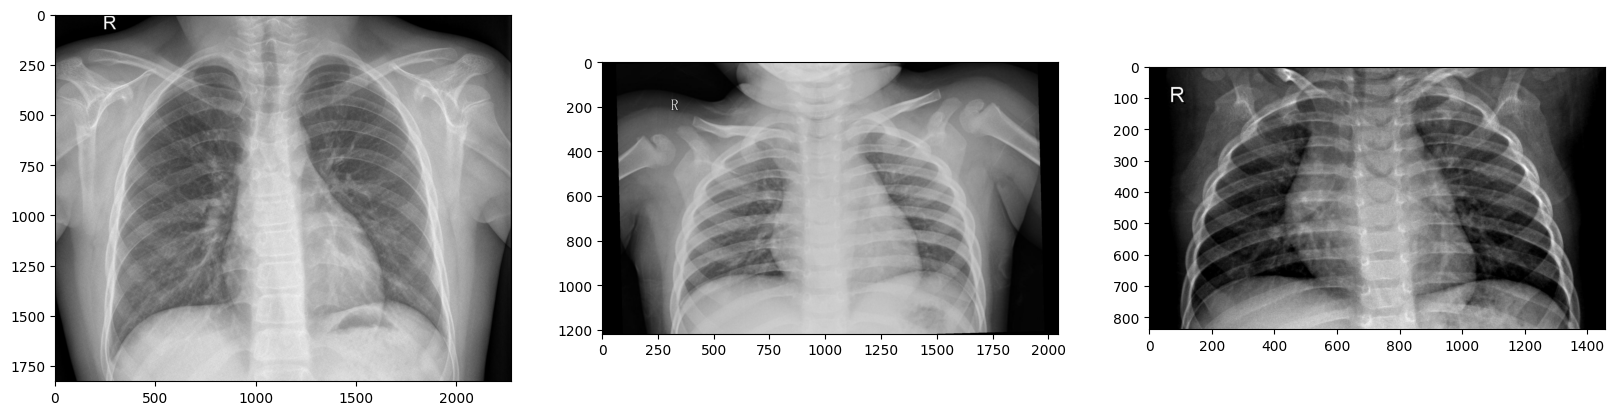

In [35]:
multipleImages=glob('C:/Users/Atzin Maxela/Desktop/ESCOM/ESCOM/Semestre 6/computo paralelo/clasificacion/chest_xray/chest_xray/test/NORMAL/**')

def plotThreeImages (images):
  r=random.sample(images,3)
  plt.figure(figsize=( 20,20))
  plt.subplot(1,3,1)
  plt.imshow(cv2.imread(r[0]))
  plt.subplot(1,3,2)
  plt.imshow(cv2.imread(r[1]))
  plt.subplot(1,3,3)
  plt.imshow(cv2.imread(r[2]));
plotThreeImages(multipleImages)


Imagenes sin Neumonía


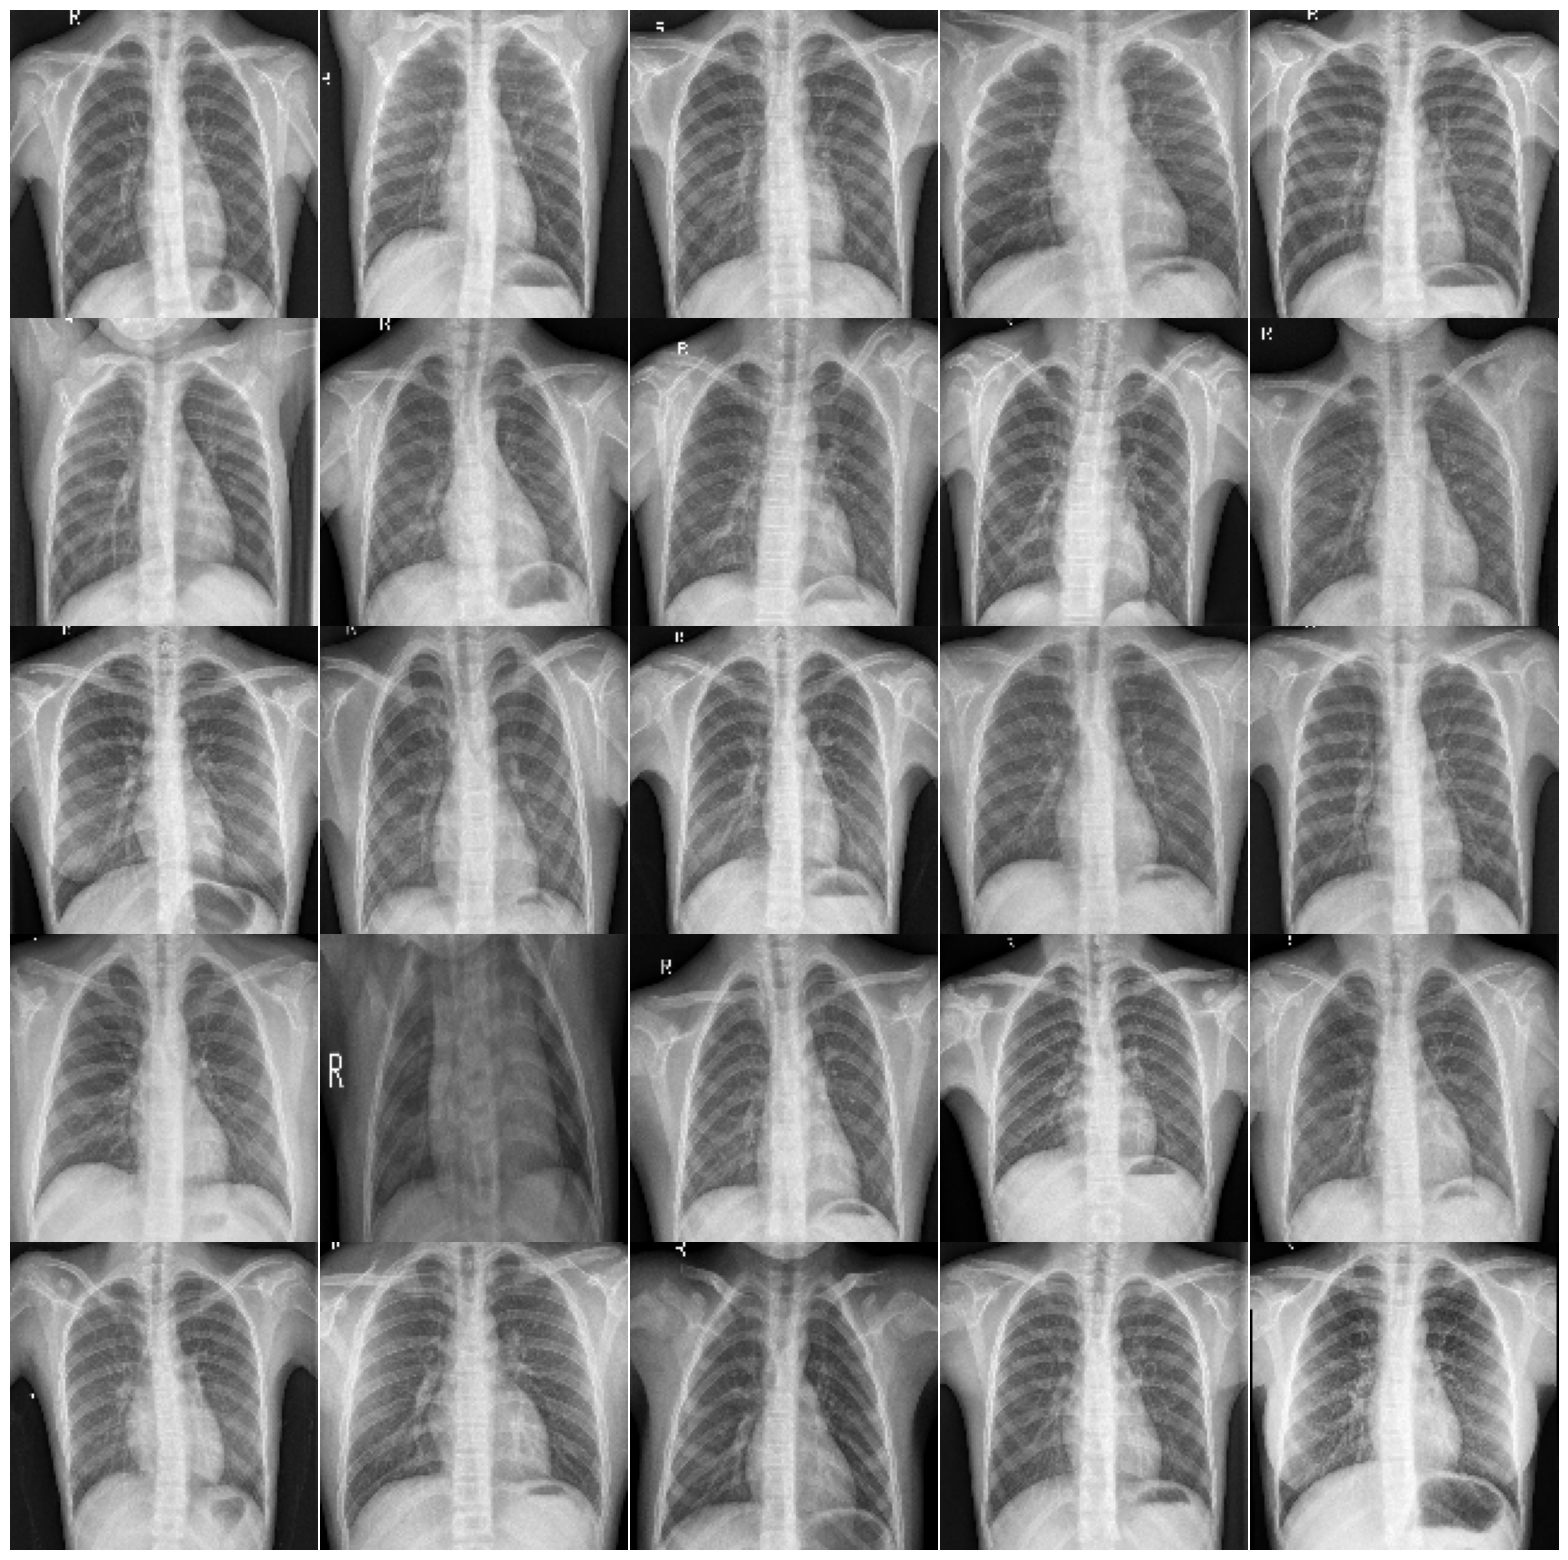

In [36]:
print ("Imagenes sin Neumonía")
multipleImages=glob('C:/Users/Atzin Maxela/Desktop/ESCOM/ESCOM/Semestre 6/computo paralelo/clasificacion/chest_xray/chest_xray/test/NORMAL/**')
i_=0
plt.rcParams['figure.figsize']=(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=0)
for l in multipleImages[:25]:
    im=cv2.imread(l)
    im=cv2.resize(im,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_+=1

Imagenes con Neumonía


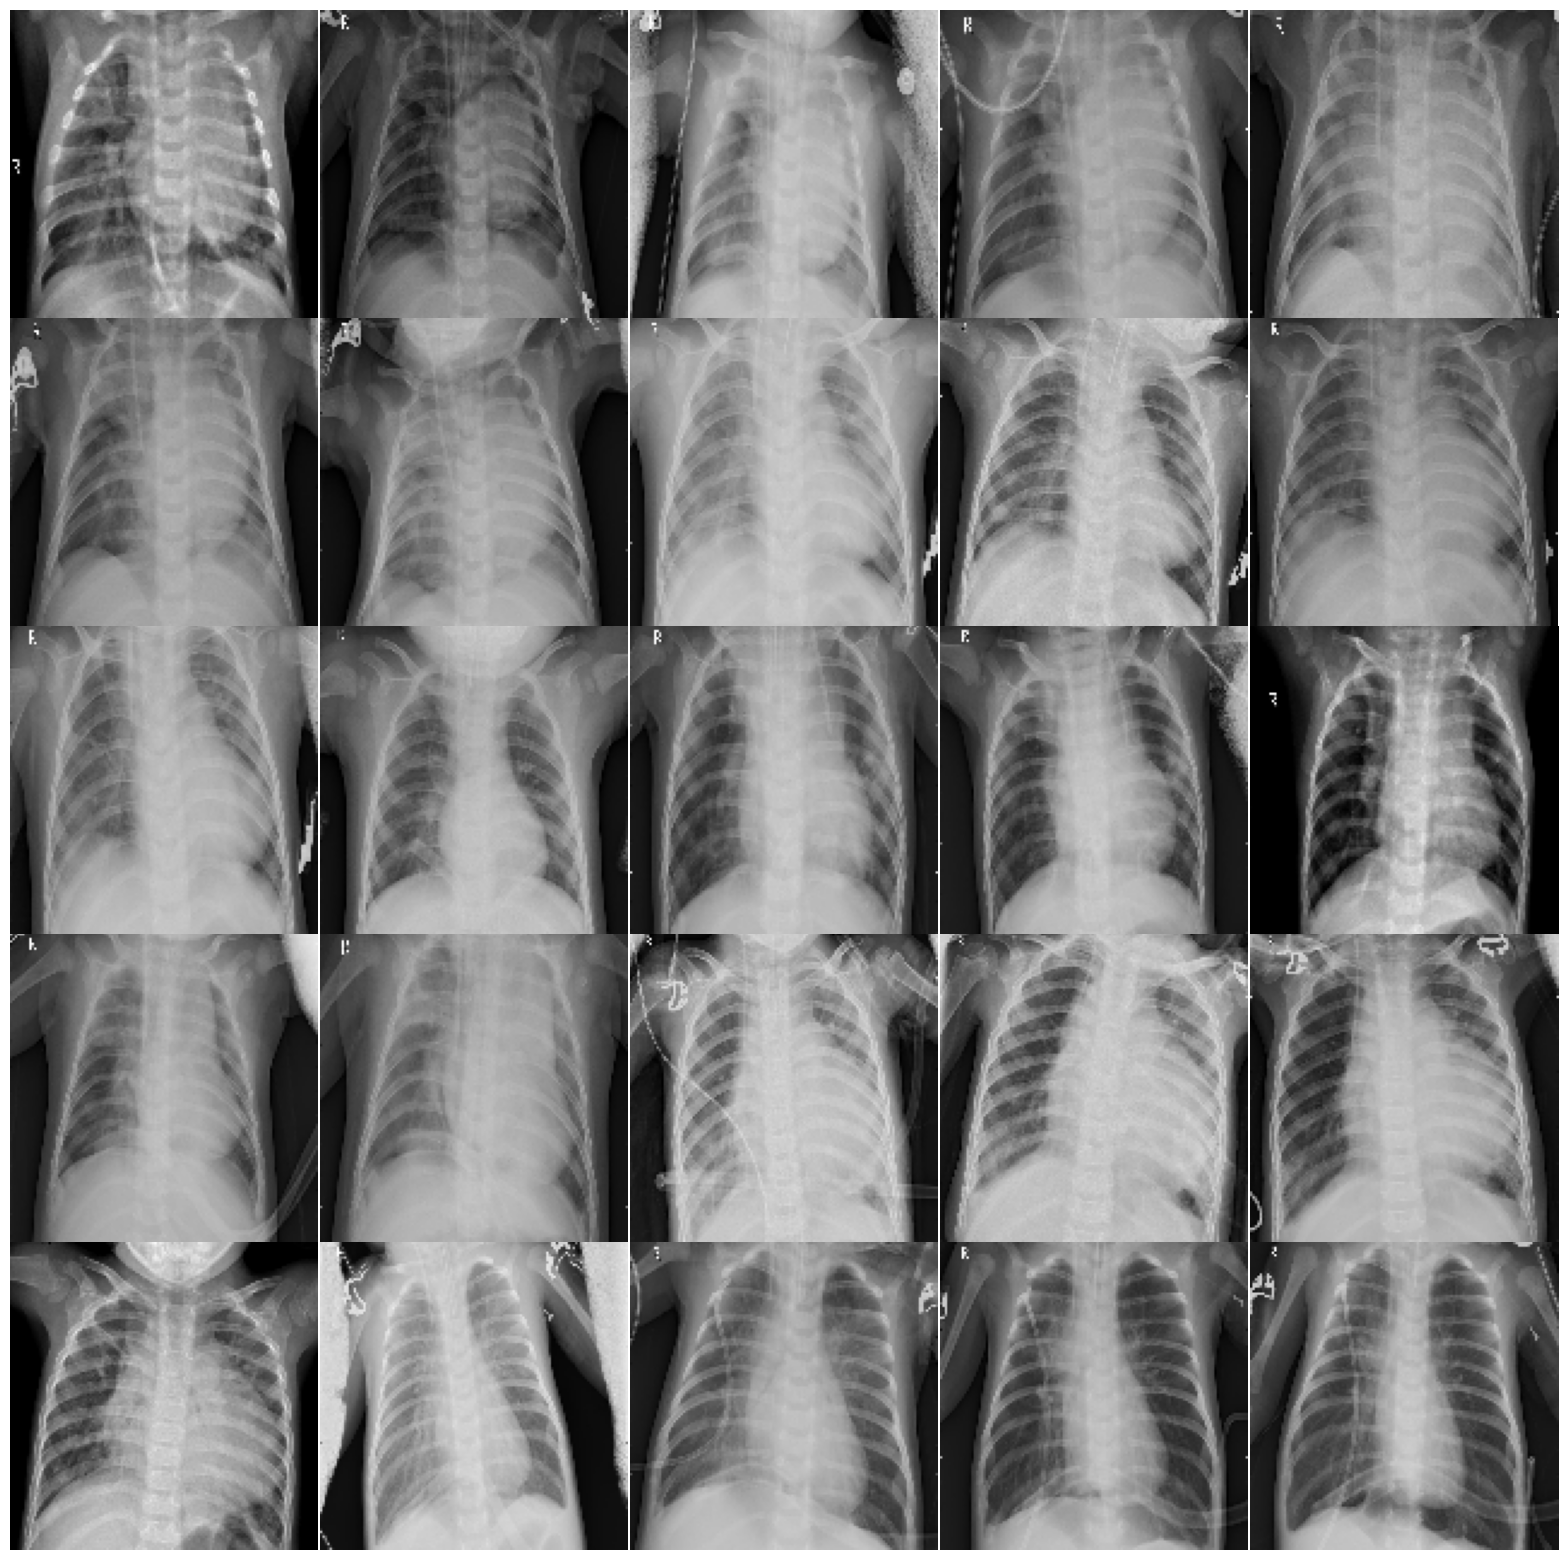

In [37]:
print ("Imagenes con Neumonía")
multipleImages=glob('C:/Users/Atzin Maxela/Desktop/ESCOM/ESCOM/Semestre 6/computo paralelo/clasificacion/chest_xray/chest_xray/test/PNEUMONIA/**')
i_=0
plt.rcParams['figure.figsize']=(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=0)
for l in multipleImages[:25]:
    im=cv2.imread(l)
    im=cv2.resize(im,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_+=1

{0: 'No neumonia', 1: 'Si neumonia'}


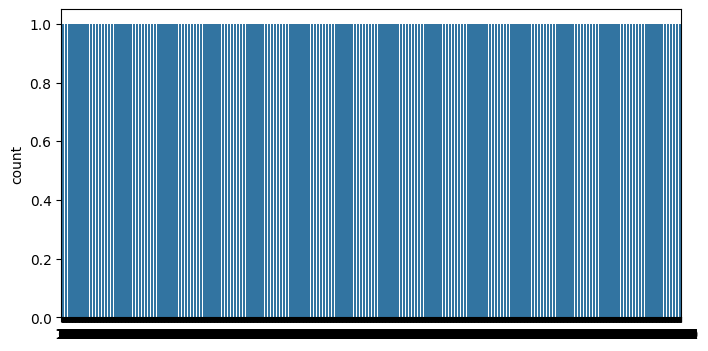

In [38]:
import seaborn as sns
plt.figure(figsize=(8,4))
map_characters={0: 'No neumonia',1: 'Si neumonia'}
dict_characters=map_characters
df=pd.DataFrame()
df['label']=y_train
lab=df['label']
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

{0: 'No Neumonía', 1: 'Si Neumonía'}


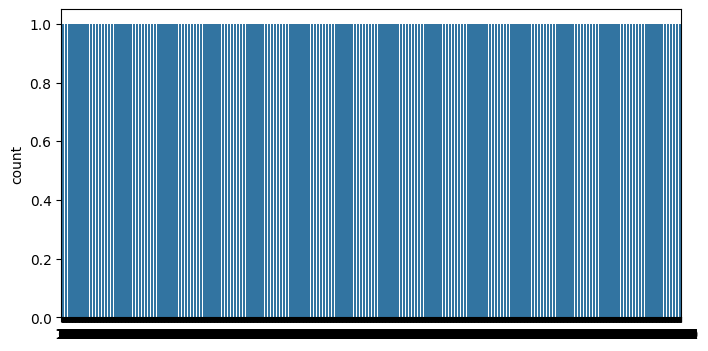

In [39]:
import seaborn as sns

plt.figure(figsize=(8,4))
map_characters = {0: 'No Neumonía', 1: 'Si Neumonía'}
dict_characters=map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [40]:
"""
X_trainReshaped.shape
y_train
"""

'\nX_trainReshaped.shape\ny_train\n'

In [41]:
x_trainReshaped = x_train.reshape(len(x_train),150,150,1)
x_testReshaped = x_test.reshape(len(x_test),150,150,1)

In [42]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

c:\Users\Atzin Maxela\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,033,218 (3.94 MB)

 Trainable params: 1,033,218 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(x_trainReshaped, 
          y_train, 
          epochs=20,
          validation_data = (x_testReshaped,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 24s 224ms/step - accuracy: 0.6120 - loss: 0.6368 - val_accuracy: 0.8542 - val_loss: 0.3468
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.9129 - loss: 0.2082 - val_accuracy: 0.7500 - val_loss: 0.9488
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 237ms/step - accuracy: 0.9484 - loss: 0.1302 - val_accuracy: 0.8622 - val_loss: 0.3643
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - accuracy: 0.9551 - loss: 0.1215 - val_accuracy: 0.8141 - val_loss: 0.5653
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.9620 - loss: 0.1004 - val_accuracy: 0.8333 - val_loss: 0.5006
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.9665 - loss: 0.0810 - val_accuracy: 0.8526 - val_loss: 0.5643
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.9715 - loss: 0.0800 - val_accuracy: 0.7869 - val_loss: 0.7994
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step - accuracy: 0.9672 - loss: 0.0801 - val_accu

In [44]:
test_loss, test_acc = model.evaluate(x_testReshaped, y_test)
print(test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6398 - loss: 2.3102
0.7964743375778198


In [45]:
test_loss, test_acc = model.evaluate(x_trainReshaped, y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9988 - loss: 0.0065


In [46]:
import tensorflow as tf
import datetime
import pandas as pd
import psutil
import time
import os


In [47]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        self.batch_times = []
        self.memory_usages = []
        self.process_id = os.getpid()

    def on_train_batch_begin(self, batch, logs=None):
        self.batch_start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        batch_time = time.time() - self.batch_start_time
        self.batch_times.append(batch_time)
        memory_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2  # MB
        self.memory_usages.append(memory_usage)

    def on_train_end(self, logs=None):
        self.total_time = time.time() - self.start_time


In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [49]:
custom_callback = CustomCallback()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    x_trainReshaped, y_train,
    epochs=5,
    validation_data=(x_testReshaped, y_test),
    callbacks=[tensorboard_callback, custom_callback]
)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.9927 - loss: 0.0179 - val_accuracy: 0.8093 - val_loss: 1.0419
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 389ms/step - accuracy: 0.9940 - loss: 0.0203 - val_accuracy: 0.7949 - val_loss: 1.5786
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 356ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.8013 - val_loss: 1.2643
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.9931 - loss: 0.0156 - val_accuracy: 0.7772 - val_loss: 1.6244
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.9968 - loss: 0.0072 - val_accuracy: 0.7853 - val_loss: 1.3082


In [50]:
results_df = pd.DataFrame({
    'Epoch': list(range(1, len(history.history['accuracy']) + 1)),
    'Accuracy': history.history['accuracy'],
    'Loss': history.history['loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Process ID': custom_callback.process_id,
    'Mean Batch Time (s)': [sum(custom_callback.batch_times)/len(custom_callback.batch_times)]*len(history.history['accuracy']),
    'Mean RAM Usage (MB)': [sum(custom_callback.memory_usages)/len(custom_callback.memory_usages)]*len(history.history['accuracy']),
    'Total Training Time (s)': [custom_callback.total_time]*len(history.history['accuracy'])
})

In [51]:
import IPython.display as display
display.display(results_df)

Epoch  Accuracy      Loss  Validation Accuracy  Validation Loss  \
0      1  0.992916  0.019146             0.809295         1.041927   
1      2  0.993661  0.018705             0.794872         1.578601   
2      3  0.996644  0.010943             0.801282         1.264274   
3      4  0.991051  0.020572             0.777244         1.624410   
4      5  0.997017  0.007635             0.785256         1.308199   

   Process ID  Mean Batch Time (s)  Mean RAM Usage (MB)  \
0       31932             0.277408          2153.655292   
1       31932             0.277408          2153.655292   
2       31932             0.277408          2153.655292   
3       31932             0.277408          2153.655292   
4       31932             0.277408          2153.655292   

   Total Training Time (s)  
0               125.670445  
1               125.670445  
2               125.670445  
3               125.670445  
4               125.670445

In [52]:
test_loss, test_acc = model.evaluate(x_testReshaped, y_test)
print(test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6154 - loss: 2.2229
0.7852563858032227


In [53]:
test_loss, test_acc = model.evaluate(x_trainReshaped, y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9963 - loss: 0.0124
